# DATA QUALITY ASSESSMENT - TASK_1

### importing relevant libraries

In [128]:
#removes warnings
import warnings
warnings.filterwarnings('ignore')

In [129]:
#for Data wrangling and analysis
import pandas as pd 
import numpy as np
#for data visualations
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
# to read files

from pandas import ExcelWriter
from pandas import ExcelFile
# for dates
import datetime


### Loading data

In [130]:
transactions = pd.read_excel(r"C:\Users\User\Downloads\KPMG Related\KPMG_VI_New_raw_data_update_final .xlsx", sheet_name='Transactions')
new_customer_lists = pd.read_excel(r"C:\Users\User\Downloads\KPMG Related\KPMG_VI_New_raw_data_update_final .xlsx", sheet_name='NewCustomerList')
customer_demographic = pd.read_excel(r"C:\Users\User\Downloads\KPMG Related\KPMG_VI_New_raw_data_update_final .xlsx", sheet_name='CustomerDemographic')
customer_address = pd.read_excel(r"C:\Users\User\Downloads\KPMG Related\KPMG_VI_New_raw_data_update_final .xlsx", sheet_name='CustomerAddress')


### EXPLORATION OF TRANSACTION DATASET

In [131]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [132]:
# checking the data type
type(transactions)

pandas.core.frame.DataFrame

In [77]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### DATA MANIPULATIONS

In [78]:
#converting date columns from integer to datetime 
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], unit='s') 

In [79]:
transactions['transaction_date'].head()

0   2017-02-25
1   2017-05-21
2   2017-10-16
3   2017-08-31
4   2017-10-01
Name: transaction_date, dtype: datetime64[ns]

In [80]:
# converting integers to datetime

transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')

In [81]:
 transactions['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

  ### OBSERVATION

There is need for more clarity on the dataset. The integers in the date columns are not correct, there is inconsistency.

In [82]:
#### checking the statistical summary of transactions dataset.
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


## CHECKING FOR AND TREATING MISSING VALUES

In [83]:
#identifying missing values
transactions.isnull().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### OBSERVATIONS

There are two many missing values in the transaction dataset.

we may decide to drop columns with missing values depending on the purpose of analysis.

In [205]:
# lets further explore the columns to know what is really going on.
transactions.columns
transactions['online_order'].value_counts()
transactions['online_order'] = transactions['online_order'].fillna(method='ffill')
transactions['brand'].value_counts()
transactions['brand'] = transactions['brand'].fillna(method='ffill')

transactions['product_line'].value_counts()
transactions['product_line'] = transactions['product_line'].fillna(method='bfill')
transactions['product_class'].value_counts()
transactions['product_class'].fillna(transactions['product_class'].mode()[0], inplace=True)



In [137]:
transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [138]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
transactions['product_size'] = imputer.fit_transform(transactions[['product_class']])
transactions['product_size'].value_counts()
transactions['standard_cost'].value_counts()
from sklearn.impute import KNNImputer


In [139]:
imputer = KNNImputer()
transactions['standard_cost'] = transactions['standard_cost'].fillna(method='ffill')
transactions['product_first_sold_date'].value_counts()
transactions['product_first_sold_date'].fillna(transactions['product_first_sold_date'].mean(), inplace=True)


In [142]:
#CHECKS
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [144]:
transactions.drop(transactions.loc[transactions['order_status']=='Cancelled'].index, inplace=True)
transactions['order_status'].value_counts()


Approved    19821
Name: order_status, dtype: int64

<AxesSubplot:xlabel='brand', ylabel='list_price'>

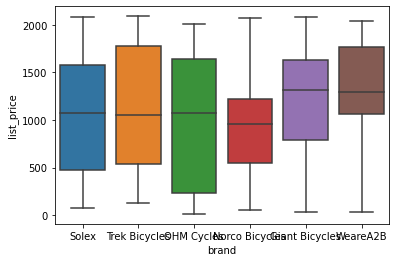

In [145]:
sns.boxplot(x='brand', y='list_price', data=transactions)

<AxesSubplot:xlabel='product_line', ylabel='count'>

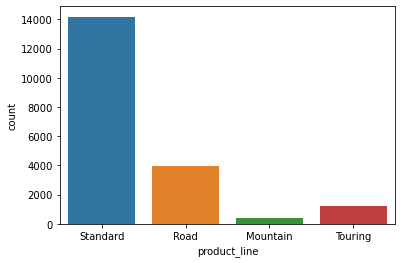

In [146]:
sns.countplot(x='product_line', data=transactions)

## CHECKING FOR DUPLICATE

In [147]:
duplicates = transactions.duplicated()
transactions[duplicates].sum()


transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

### OBSERVATIONS

The data looks consistent and there are no duplicate values.

## EXPLORATION OF new_customer_lists DATASET

In [148]:

new_customer_lists.head()



,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.49,0.6125,0.765625,0.650781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.85,0.8500,1.062500,0.903125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.78,0.7800,0.780000,0.780000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.64,0.8000,0.800000,0.800000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.09,1.0900,1.362500,1.362500,4,4,1.703125


In [149]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

#### OBSERVATIONS

There are unnamed columns in the data,the unnamed columns should be drop.

In [150]:
# Dropping all Unnamed Column
unnamed_columns = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
new_customer_lists = new_customer_lists.drop(unnamed_columns, axis=1)


In [151]:
#new_customer_lists.info()

### STATISTICAL SUMMARY 

In [152]:
# checking the statistical summary of 
new_customer_lists.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


### TREATING MISSING VALUES

In [153]:
# Checking for missing values
new_customer_lists.isnull().sum()


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

### OBSERVATIONS

There are missing values. There two columns relevant to these analysis that are having missing values.

### DUPLICATES CHECK

In [93]:
##Checking for duplicates
    
new_customer_lists.duplicated().sum()

0

### OBSERVATION

There are no duplicate value in new_customer_lists dataset

### EXPLORING COLUMNS AND SHAPE OF THE DATA

In [94]:
new_customer_lists.shape

(1000, 18)

In [97]:
new_customer_lists['gender'].value_counts()

# Replace 'U' with 'not declaredN'
new_customer_lists['gender'].str.replace('U','not declared')
new_customer_lists['DOB'].describe()


count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

### EXPLORING CUSTOMER DEMOGRAPHIC DATASET

In [154]:
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.3)

In [155]:
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
defaults                               302
owns_car                                 0
tenure                                  87
dtype: int64

In [156]:
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [157]:

customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,defaults,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [158]:
customer_demographic.head()
customer_demographic['defaults'].value_counts()



100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: defaults, Length: 90, dtype: int64

### OBSERVATIONS
There are lots of incorrect values, we would however drop the column

In [160]:
# dropping columns with incorrect values and printing the first five records to check;
customer_demographic = customer_demographic.drop('defaults', axis=1)




In [161]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [162]:
# Replace 'U' with 'not declared'
customer_demographic['gender'].str.replace('U','not declared')
customer_demographic['DOB'].describe()

count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [163]:
customer_demographic.info()
customer_demographic['gender'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

### OBSERVATION
There are some contraditions that needs to be replaced

In [164]:
# Replace inconsistent values with appropriate values
customer_demographic['gender'] = customer_demographic['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','not declared')
customer_demographic['gender'].value_counts()


Female          2039
Male            1873
not declared      88
Name: gender, dtype: int64

## EXPLORING CUSTOMER ADDRESS

In [166]:
customer_address.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [167]:
customer_address.isnull().sum()


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [168]:
customer_address.describe()


,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [169]:
customer_address['address'].value_counts()


3 Talisman Place               2
64 Macpherson Junction         2
3 Mariners Cove Terrace        2
74011 Manufacturers Street     1
518 Donald Street              1
                              ..
8572 Melvin Drive              1
44083 Village Court            1
314 Northland Plaza            1
67348 Lakewood Gardens Road    1
7 Farmco Trail                 1
Name: address, Length: 3996, dtype: int64

In [170]:
customer_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [171]:
customer_address.loc[customer_address['state'] == 'New South Wales', 'state'] = 'NSW'
customer_address.loc[customer_address['state'] == 'Victoria', 'state'] = 'VIC'
customer_address['state'].value_counts()



NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [172]:
customer_address['country'].value_counts()


Australia    3999
Name: country, dtype: int64

In [173]:
customer_address['property_valuation'].value_counts()


9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

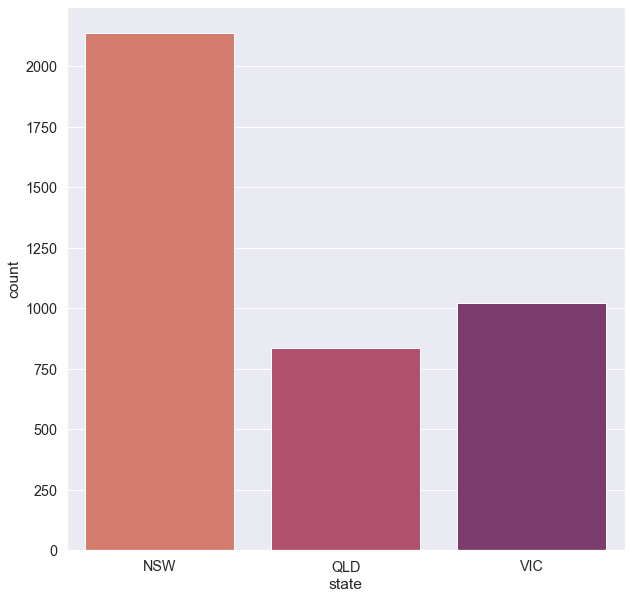

In [175]:
sns.countplot(x='state', data=customer_address, palette=("flare"))


<AxesSubplot:xlabel='property_valuation', ylabel='count'>

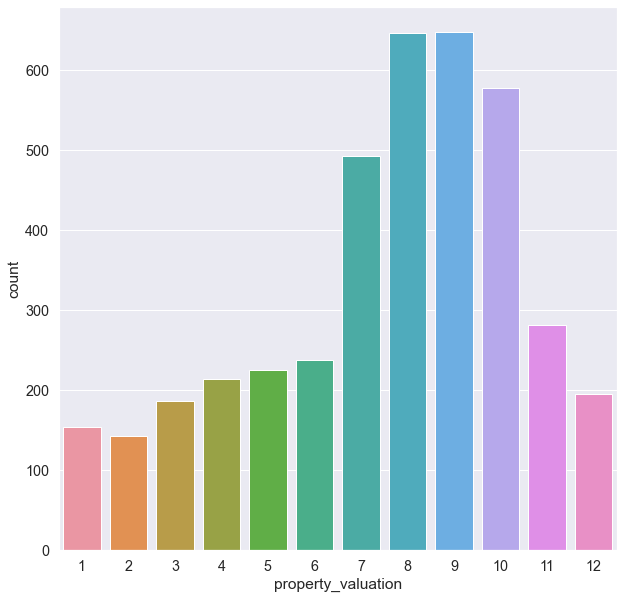

In [176]:
sns.countplot(x='property_valuation', data=customer_address)

## DATA AGGREGATION

since all the tables have common relationship to customer, it is useful to merge them for the purpose of analysis.

In [177]:
new_customer_lists.head()
customer_demographic['customer_id'].iloc[-1]
new_customer_lists.insert(0, 'customer_id', range(4001, 4001 + len(new_customer_lists)))
new_customer_lists.head()
customer_demographic.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


 Merging the Customer Demographic with the Customer Address table before joining with New Customer List

In [189]:
customer_add.head()
# Merge dataframes using the customer_id column
customer_demographic = pd.merge(customer_demographic, customer_address, how='left', on='customer_id')


In [190]:
#customer_demographic = customer_demographic.drop(['address_x','postcode_x','state_x','country_x','property_valuation_x'], axis=1)

KeyError: "['address_x' 'postcode_x' 'state_x' 'country_x' 'property_valuation_x'] not found in axis"

In [191]:
customer_demographic.head()



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,address_y,postcode_y,state_y,country_y,property_valuation_y,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,060 Morning Avenue,2016.0,NSW,Australia,10.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,0 Holy Cross Court,4211.0,QLD,Australia,9.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,17979 Del Mar Point,2448.0,NSW,Australia,4.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0


In [192]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [193]:
final_df = pd.concat([customer_demographic, new_customer_lists], ignore_index=True, sort=False)
final_df


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state_y,country_y,property_valuation_y,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,NSW,Australia,10.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,NSW,Australia,10.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,QLD,Australia,9.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,NSW,Australia,4.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,...,NaN,NaN,NaN,2 Sloan Way,2200.0,NSW,Australia,7.0,996.0,0.374
4996,4997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,...,NaN,NaN,NaN,04 Union Crossing,2196.0,NSW,Australia,10.0,997.0,0.357
4997,4998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,...,NaN,NaN,NaN,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,997.0,0.357
4998,4999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,...,NaN,NaN,NaN,57666 Victoria Way,4215.0,QLD,Australia,2.0,997.0,0.357


In [195]:
final_df.to_csv('finalTransactions.csv')
final_df.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state_y,country_y,property_valuation_y,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,NSW,Australia,10.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,NSW,Australia,10.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,QLD,Australia,9.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,NSW,Australia,4.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0,NaN,NaN


In [198]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
final_df['job_title'] = final_df['job_title'].fillna(method='ffill')
final_df['job_industry_category'] = final_df['job_industry_category'].fillna(method='ffill')


In [199]:
final_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state_y,country_y,property_valuation_y,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,NSW,Australia,10.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,NSW,Australia,10.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,Recruiting Manager,IT,Mass Customer,N,...,QLD,Australia,9.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,...,NSW,Australia,4.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0,NaN,NaN
